<a href="https://colab.research.google.com/github/Howida100/deep-learning-/blob/master/visualization_drebin_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://stackabuse.com/introduction-to-neural-networks-with-scikit-learn/
#https://gist.github.com/githubssd/ac0b477df0284f157aa44b9b8e16dcaf
#http://nali.org/load-google-drive-csv-panda-dataframe-google-colab/
#https://www.kaggle.com/residentmario/styling-your-plots

    
from sklearn.neural_network import MLPClassifier       #Neural Network
                         
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
import numpy as np

%matplotlib inline


# Install Keras with pip
!pip install -q keras
import keras
!apt-get install graphviz -y

Using TensorFlow backend.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 30 newly installed, 0 to remove and 5 not upgraded.
Need to get 4,154 kB of

In [5]:
# Install Keras with pip
!pip install -q keras
import keras
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [1]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving drebin_reduced.arff.csv to drebin_reduced.arff (3).csv


In [0]:
import pandas as pd

In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "drebin_reduced.arff.csv" with length 4515348 bytes


In [4]:
uploaded

{'drebin_reduced.arff.csv': b"'',APP_NAME,SMS_MMS__SMS_MMS,SMS_MMS__FILE_INFORMATION,SMS_MMS__UNIQUE_IDENTIFIER,SMS_MMS__FILE,SMS_MMS__BLUETOOTH,SMS_MMS__BLUETOOTH_INFORMATION,SMS_MMS__EMAIL,SMS_MMS__VOIP,SMS_MMS__NETWORK,SMS_MMS__IMAGE,SMS_MMS__DATABASE_INFORMATION,SMS_MMS__ACCOUNT_SETTINGS,SMS_MMS__VIDEO,SMS_MMS__PHONE_CONNECTION,SMS_MMS__CALENDAR_INFORMATION,SMS_MMS__WIDGET,SMS_MMS__NFC,SMS_MMS__LOCATION_INFORMATION,SMS_MMS__LOG,SMS_MMS__BUNDLE,SMS_MMS__BROWSER_INFORMATION,SMS_MMS__SYSTEM_SETTINGS,SMS_MMS__AUDIO,SMS_MMS__IPC,SMS_MMS__PHONE_STATE,SMS_MMS__ACCOUNT_INFORMATION,SMS_MMS__SYNCHRONIZATION_DATA,SMS_MMS__CONTACT_INFORMATION,SMS_MMS__NO_CATEGORY,SMS_MMS__NETWORK_INFORMATION,FILE_INFORMATION__SMS_MMS,FILE_INFORMATION__FILE_INFORMATION,FILE_INFORMATION__UNIQUE_IDENTIFIER,FILE_INFORMATION__FILE,FILE_INFORMATION__BLUETOOTH,FILE_INFORMATION__BLUETOOTH_INFORMATION,FILE_INFORMATION__EMAIL,FILE_INFORMATION__VOIP,FILE_INFORMATION__NETWORK,FILE_INFORMATION__IMAGE,FILE_INFORMATION__DATA

In [5]:
!ls

'drebin_reduced.arff (1).csv'  'drebin_reduced.arff (3).csv'   sample_data
'drebin_reduced.arff (2).csv'   drebin_reduced.arff.csv


In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('drebin_reduced.arff.csv')
df

''                                           APP_NAME  \
0        1  a8621506344640b8cc0d40d9bc3a124ddfeae48eeac5a8...   
1        2  00002d74a9faa53f5199c910b652ef09d3a7f6bd42b693...   
2        3  54b826480d096543873e31cbcf42f78706b48d5034b105...   
3        4  10c5916590dac85bb7e14691a0b77114b7de9c33fa5878...   
4        6  13cbfc8772cfd18eebf87bba0e1f5280f220c5daa4d6ab...   
5        7  6f1af02b1836ac348e90b0ac69cd57f1f396b9b1d886be...   
6        8  b387fee6de2400fb045b100437f82bcaf10dfa605eedeb...   
7        9  6337b2ed626ae2ff6f9bd7e09a90abf78cc61c301d5dd1...   
8       11  b439f642007bd707ac806ba3f71e7b2a022e261fbd9b5d...   
9       12  f4ccbe2c567e1f7fd9eaca2a92d5230956aa8b5a2d9b79...   
10      13  2bdc0e959fd300abe76a974b01535d654b08573300c1b9...   
11      14  d710998cc0c38046d8c3713463b992b925a647780d6103...   
12      15  a97f41f4e73f81086b5b35120e0a9d939d05c6cab3e0b2...   
13      16  d29b3c54de0596093aa0067423ee0d988c62f64c5bed90...   
14      17  31707b3fb668b27c43666ddfea66fb76105f2eb17ceb5c...   
15      18  827f534f7f660783fb2638c92f955bcb41136f7c8e6725...   
16      19  38a90e9ab4faa62ea71f1fc726ba4b747fa363d9f4d15e...   
17      20  0ccc7f9cade5aa4a8d462bb5ca01f1ea657739ac04be8a...   
18      21  6b85dee9184dc8f0434ec5c8b0d92d935fc5f687ce358b...   
19      22  4338fc4bec543e5fb28225333179c5ebd373b612d2da35...   
20      23  37c95029de50c52e3416b394e2feb27ac9e1fc11954ff8...   
21      24  0c2f5f9e5fb6b745bac3a5bccb56eae99357d14de0121d...   
22      25  b5123f1f5c0997098d2a427deee08567ce24f821aeddaf...   
23      27  5023ef25aefddeefd294a0fb6692d4e6c5091294ac3b4d...   
24      28  34673f7b8ebc727dc4c1fa78cccb62b466cb2c0e93764b...   
25      29  ff39b7c56d5db6d32c013231ea1931087ae89674569ad2...   
26      30  54b9d932c2a2dd3903d6e58e34cf569ec5a7233a5ee622...   
27      31  1f035efeca8e72c61e2b48bc475d37988b08803e538b51...   
28      32  f09d3c855964685ea959b881382728f733e8021675f8bb...   
29      33  365b4daf45f7306879fcf15eca4c579423746e517a31f3...   
...    ...                                                ...   
1889  2175  7bdc09f747a99040bc094b0639e6a74a4a0c8112c1fc33...   
1890  2177  94adb4f813f9adbfe0215e83fdb1401a405a42da975bde...   
1891  2179  82469085f7f459054b82bd1a17ec8b07d4dbf7ffa8f89f...   
1892  2180  ef0fda153da9bd1e51dafc451b5aeb75426d17f49a70e1...   
1893  2181  b327c0bbb16c9adcd566877ac29dc0b0edcff9e654dad6...   
1894  2183  370eae9a4cc12bfb36d51d91d34d3f51068cf5442ff7c2...   
1895  2184  d521b8787d8641993c14f4feb103d1b4114eb6bce5184f...   
1896  2185  d7a6ddc6c79903782ec1c82e5dd6f99fb3a247499b28d2...   
1897  2186  d779d5c0dd204d725b12501ee96752b96bcbcbf1c5e241...   
1898  2187  9e3e31d8a9af98b8d270ee1d7c8cdb78291818e7548358...   
1899  2188  91c7326afc491ee20376114d02ea53183b0ab11e976597...   
1900  2189  6461ed93b92eb30c1711a20fca754f49266281af1f41d7...   
1901  2190  18af39f45267418f34b5a821d2d6bd00a21c6d62f1c6d8...   
1902  2191  a42b8cd82ed6d6d342c090d7a49b6a86e9ad4635fea872...   
1903  2192  fadd8276d7e00887f6a5c897d49e1bc935217684f9d124...   
1904  2193  b73ea32909e025a1aca6b77a83af0e8e6966ac11cfdb91...   
1905  2194  8b6b5d77eb4525e70f3cece32c34bb13fa0de3fcf9f4e2...   
1906  2195  c2236e4159e14623214c9f22eb8b373ae47c20cef12639...   
1907  2196  cab2089ede78b4bebf0a9423b8889d22238976bc9439cc...   
1908  2197  807a51c6bc10f6e32f615a23d8009ba1b46373c217e2bb...   
1909  2198  fd741b5e853ddf8c013a3ec4014f0c6857b71db87309c7...   
1910  2199  4cf68f3e1887f8a3428d1f32d324da04ba515c0af4acbd...   
1911  2201  1c5913349f936da630d7704edabb78c497c028b0e7981a...   
1912  2202  f797826a255ae241204136c6cd6def68bdde3c489d5315...   
1913  2203  06833a3279b04c3f077fbae9f15f7c75f60ac50523bee0...   
1914  2205  8222131da26ce5d5ace34ee9026afd87a4d9f7ca6654d0...   
1915  2209  cd31b23d8b81058a797833655cb26fddadf6c81a299ab1...   
1916  2210  29ccf750cfa5a41f2cfb629fd82f9b39173fdace362fe4...   
1917  2212  212aa193b9f5a688a650366970c02987c99d07f6b1e50f...   
1918  2213  b79a3cdeab99437b00857aab8a00a26

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install graphviz

In [8]:
df.columns

Index(['''', 'APP_NAME', 'SMS_MMS__SMS_MMS', 'SMS_MMS__FILE_INFORMATION',
       'SMS_MMS__UNIQUE_IDENTIFIER', 'SMS_MMS__FILE', 'SMS_MMS__BLUETOOTH',
       'SMS_MMS__BLUETOOTH_INFORMATION', 'SMS_MMS__EMAIL', 'SMS_MMS__VOIP',
       ...
       'ACTION_REBOOT', 'ACTION_DOCK_EVENT', 'ACTION_GET_RESTRICTION_ENTRIES',
       'ACTION_USER_INITIALIZE', 'ACTION_USER_FOREGROUND',
       'ACTION_USER_BACKGROUND', 'ACTION_QUICK_CLOCK', 'ACTION_OPEN_DOCUMENT',
       'ACTION_CREATE_DOCUMENT', 'class'],
      dtype='object', length=1122)

In [9]:
len(df)







1919

In [10]:
df['class'].value_counts().head()

Plankton       415
BaseBridge     263
DroidKungFu    220
GinMaster      185
Iconosys       101
Name: class, dtype: int64

In [33]:
df['SMS_MMS__SMS_MMS'].value_counts().head(1919)

0    1919
Name: SMS_MMS__SMS_MMS, dtype: int64

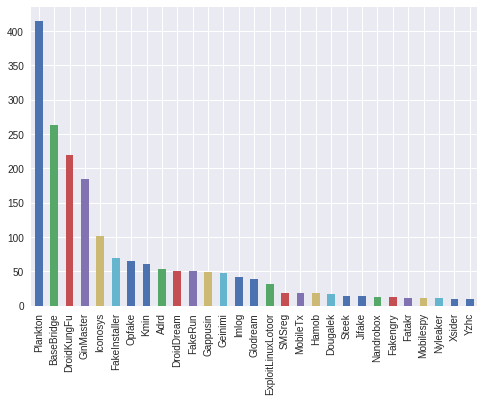

In [31]:
df['class'].value_counts().head(1919).plot.bar()

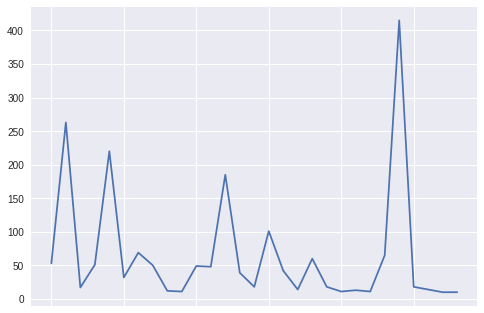

In [12]:
df['class'].value_counts().sort_index().plot.line()

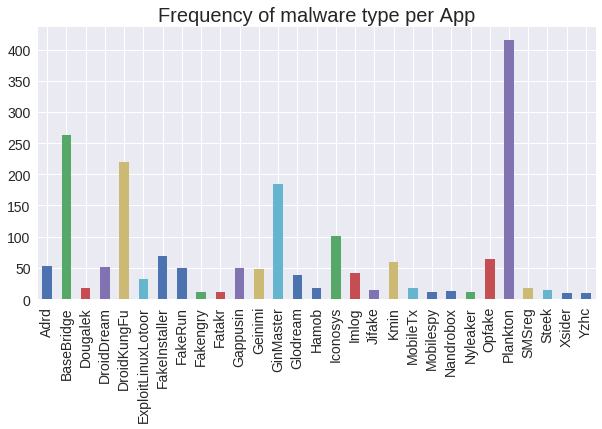

In [30]:
#color='mediumvioletred'
import matplotlib.pyplot as plt
import seaborn as sns
ax=df['class'].value_counts().sort_index().plot.bar(figsize=(10, 5),fontsize=14,title= 'Frequency of malware type per App',
                                                )
ax.set_title("Frequency of malware type per App", fontsize=20)
sns.despine(bottom=True, left=True)#turn off the ugly black border

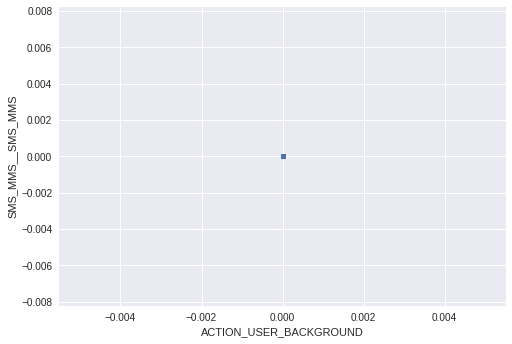

In [40]:
df.sample(100).plot.scatter(x='ACTION_USER_BACKGROUND', y='SMS_MMS__SMS_MMS')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
import numpy as np

%matplotlib inline

In [0]:
X = df.iloc[:, 2:1120 ].values  #Note: Exclude Last column with all NaN values.
y = df.iloc[:, 1121 ].values

In [0]:
#Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

y = labelencoder.fit_transform(y)

In [0]:
df.iloc[['1', '2', '3']]

In [0]:
df[:3]

In [0]:
df[3:6]

In [0]:
df['class']

In [0]:
df['class'].value_counts().head()

In [0]:
df[['APP_NAME', 'class']][:3]

In [0]:
df.APP_NAME.iloc[[2]]

In [0]:
df[df.APP_NAME=='a8621506344640b8cc0d40d9bc3a124ddfeae48eeac5a8']

In [0]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [0]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [0]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  


In [0]:
mlp.fit(X_train, y_train)

In [0]:
predictions = mlp.predict(X_test) 

In [0]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

In [0]:








!pip install -q xlrd